# TF-IDF + persistence homology

## TF-IDF

In [1]:
%load_ext autoreload
%autoreload 2
from bugless import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## TODO

- Un bon preprocessing
- Exploiter des propriétés sur les barcodes
- Les tf différents e.g. 0/1
- Normalisation
- Parametric distance
- Dimensionality reduction (PCA) : mais les données sont de haute dimension en soit si on ne considère pas les sens des mots?

### Notes on the implementation

- On n'utilise pas ```for``` dès possible
- On utilise sparse matrices
- Données dupliquées
- Ce code peut traiter les données d'ordre 10^4

In [2]:
pairs = categories_description_pairs("details.json")[:2000]
pairs = dedup(pairs)
print(len(pairs))
print(pairs[0:3])

1682
[(['Enchères', 'Aventures dans la jungle', 'Collection / famille', 'Exploration', "Placement d'ouvrier"], '\n                      Vous êtes à la tête d’un groupe d’aventuriers et d’archéologues en expédition dans les ruines du temple de Quetzal. Les joueurs ont 5 tours pour explorer l’île de Quetzal et collecter de précieux artefacts. Les joueurs lancent leurs meeples et les envoient dans les différents lieux de l’île pour récupérer des artefacts. Ils les livrent ensuite pour améliorer leurs fouilles ou marquer des points de victoire et tenter de gagner la partie.\n                  '), (['Card-driven', 'Combinaison', 'Coopération', 'Deck building', 'Locomotion & voyage', 'Humour', 'Gestion', 'Science fiction'], '\n                      Le Dr Foo a créé une terrrrible Machine à voyager dans le temps ! Aidé par les Clones de lui-même qu’il génère dans le temps, il vise à concrétiser Omniscience 2000, son projet de se rendre maître de l’Univers. Mais les failles spatio-temporelles 

In [3]:
categories = list(set(((sum([p[0] for p in pairs],[])))))
print(len(categories), categories)

180 ['Cochon', 'Passionné', 'Créativité', 'Transport de marchandise', 'Dés', 'Samurai', 'Guessing', 'Science fiction', 'Politique', 'Coopération', 'Observation', 'Amateur', 'Mémoire', 'Chat', 'Locomotion & voyage', 'Défausse', 'Simulation', 'Lettres / mots', 'Déplacement', 'Divers', 'Humour', 'Cirque', 'Jeu de logique', 'Cambriolage', 'Construction', 'Jeux de guerre', 'Vote', 'Enchères cachées', 'Draft', 'Connexions', 'Plateau modulaire', 'Diplomatie', 'Art', 'Super Héros', 'Hospitalier', 'Espion', 'Dessin', 'Pari', 'Cyberpunk', 'Contes, Mythes & Légendes', 'Enchères à poing fermé', 'Monstre', 'Card-driven', 'Narration', "Placement d'ouvrier", 'Fantôme', 'Enchères a un tour', 'Commerce', 'Robots', 'Question', 'Maritime', 'Connaissances', 'Colonisation', 'Taquin', 'Loups-garous', 'Collection / famille', 'Desert', 'Afrique', 'Blocage', 'Devinette', 'Rôle', 'Asie', 'équipe', 'Elimination', 'Les îles', 'Livre dont vous êtes le héros', 'Egypte', 'Far-west', 'Course', 'Catastrophe', 'Dextéri

In [4]:
docs = preprocess([p[1] for p in pairs], 'french', True)
print(docs[-5:])

[['trois', 'nouveau', 'dé', 'offrent', 'altern', 'jou', 'dan', 'blockbust', 'retrouv', 'deux', 'héros', 'film', 'aventur', 'baroudeur', 'jol', 'pep', 'dispos', 'symbol', 'doubl', 'fusil', 'si', 'mang', 'cerveau', 'comm', 'si', 'mang', 'deux', 'miam', 'jol', 'pep', 'blond', 'dispos', 'deux', 'symbol', 'fusil', 'trois', 'symbol', 'empreint', 'rend', 'fois', 'rapid', 'danger', 'dan', 'per', 'noël', 'rencontr', 'zomb', 'dout', 'per', 'noël', 'vill', 'dispos', 'trois', 'symbol', 'spécial', 'représent', 'cadeau', 'casqu', 'boisson', 'énerget', 'doubl', 'cerveau', 'bien', 'entendu', 'pouv', 'auss', 'mang', 'cerveau', 'vrai', 'noël', 'zomb', 'fin', 'cross', 'over', 'deux', 'sup', 'product', 'utilis', 'trois', 'nouveau', 'dé', 'voir', 'per', 'noël', 'port', 'secour', 'deux', 'héros', 'trois', 'nouvel', 'mani', 'mang', 'cerveau', 'tout', 'dan', 'zomb', 'dic', 'doubl', 'détent', 'cerveeeaaaauuuuux'], ['carnaval', 'venis', 'nuit', 'plein', 'anim', 'joyeux', 'voix', 'exhuber', 'rir', 'chanson', 'pe

In [5]:
vecs = tfidf(docs)
vecs = csr_matrix(vecs)

## Persistence homology dim 0

On the function
$$
f(p) = \min_{q \in A}(p-q)
$$

In [6]:
deathes = compute_barcodes(vecs, metric='cosine')
print(deathes[:10])
print(np.unique(deathes))

[0.0, 0.0, 0.20162481272526425, 0.20871977849733275, 0.2163109539336799, 0.21845766900218086, 0.22124552048663138, 0.22194939226281504, 0.22245788327439187, 0.22344481480702819]
[0.         0.20162481 0.20871978 ... 3.59049602 3.64040871        inf]


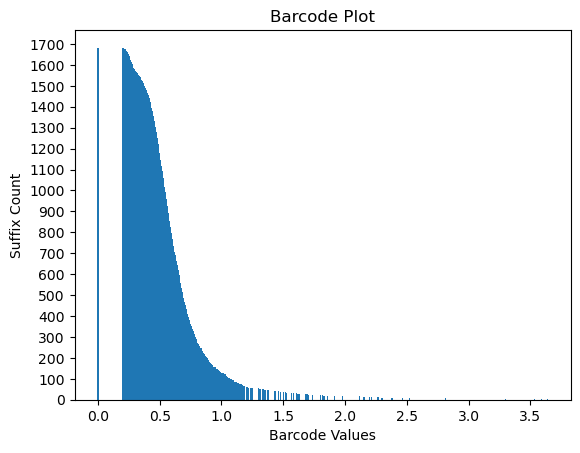

In [7]:
def graph():
    x, y = np.unique(deathes, return_counts=True)
    # fix np.inf
    x[-1] = x[-2]

    y = y[::-1].cumsum()[::-1]
    fig, ax = plt.subplots()
    ax.bar(x, y, width=0.01)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.set_xlabel('Barcode Values')
    ax.set_ylabel('Suffix Count')
    ax.set_title('Barcode Plot')
    plt.show()
graph()

- Il existe un virage et des espaces à partir de 200, et on a bien environ 200 catégories et il existe des espaces aussi à partir de cela; peut-être on peut trouver quelque chose; si cela veut dire quelque chose, on peut prédire combien de catégories il y a pour un ensemble des descriptions :P

Tout ce que fait en général le persistence module est de faire union à un component connexe. Il existe de bons résultats localement mais rien très util.

On en déduit que les données sont parse comme avant.

In [8]:
nc, labels = connected_components_under_dist(vecs, 6, 'cosine')
def incre(d : dict, key):
  d[key] = d.get(key, 0) + 1
statistics = [dict() for _ in range(nc)]
for i in range(len(labels)):
  for cate in pairs[i][0]:
    incre(statistics[labels[i]], cate)
  incre(statistics[labels[i]], 'cnt')
  statistics[labels[i]][i] = True
for i in range(nc):
  if statistics[i]['cnt'] == 1:
    continue
  print(i, statistics[i]['cnt'], end='')
  print(statistics[i])



0 1682{'Enchères': 27, 'Aventures dans la jungle': 2, 'Collection / famille': 91, 'Exploration': 131, "Placement d'ouvrier": 62, 'cnt': 1682, 0: True, 'Card-driven': 42, 'Combinaison': 164, 'Coopération': 132, 'Deck building': 59, 'Locomotion & voyage': 23, 'Humour': 56, 'Gestion': 103, 'Science fiction': 78, 1: True, 'Choix simultanés': 58, 'Dés': 130, 'Duplicate': 3, 2: True, 'Ambiance': 153, 'Observation': 73, 'Cirque': 3, 'Connexions': 34, 'Enquêtes et Policiers': 42, 'Déduction': 77, 'Fantôme': 12, 'Halloween': 7, 'Enigme': 42, "Parc d'Attraction": 3, 3: True, 'Elimination': 54, 'Trahison': 25, 4: True, 'Placement': 124, 5: True, 'Fantastique': 98, 'Narration': 55, 6: True, 'Déplacement': 138, 7: True, 'Renaissance': 13, 8: True, 'Casual': 107, 'Abstrait': 38, 'Affrontement': 213, 9: True, 'Parcours': 31, 'Médiéval-fantastique': 121, 'Monstre': 44, 'Hasard (Dé, Cartes, ...)': 161, 10: True, 11: True, 'Rangement': 9, 'Contes, Mythes & Légendes': 88, 'Religion': 8, 12: True, 'Vote':

In [9]:
print(pairs[644][1], '---')
print(pairs[650][1], '---')


                      Ce booster contient :

les personnages uniques Negan et Andy,
un rôdeur inédit,
quatre cartes d'équipements
deux cartes de personnages (Negan et Andy).

La boîte de base du jeu de figurines "The Walking Dead : All Out War" est nécessaire pour jouer.
                   ---

                      Ce booster contient :

les personnages uniques Lee & Clementine les deux personnages emblématiques du jeu de TellTale, 
un rôdeur inédit, 
quatre cartes d'équipements,
deux cartes de personnages

La boîte de base du jeu de figurines "The Walking Dead : All Out War" est nécessaire pour jouer.
                   ---


## Sur la homologie persistence

Il s'agit de décomposer un module persistence. Mais dans notre cas c'est très simple.

Imaginons $t$ un paramètre du temps, regardons $f^{-1}(]\infty, t])$, c'est des parties de $\mathbb{R}^d$ connexes. Quand on fait varier $t$ de $0$ à $\infty$, des parties connexes apparaissent, fushionnent, finalement à une partie connexe.

Quand il y a une fushion qui se produit, on identifie la nouvelle partie à la plus vieille partie fushionnée. Dans cette situation, les autres parties meurent.

Ce que l'on appelle les barcodes sont des paires des naissances et morts des parties connexes.

La bonne propriété (on considère une fonction docile) est que, malgré le fait qu'il y ait du bruit dans nos données, les parties connexes créées par du bruit apparaissent et disapparaissent rapidement, et les vraies parties connexes doivent rester plus longtemps.

Formellement, on peut faire des paires des barcodes des données sans bruit et ceux des données avec bruit, la somme des distances des paires doit être petite s'il n'y a pas trop de bruit.